# Loan Data -- Explore and Clean

In [70]:
import pandas as pd
import numpy as np

In [71]:
# Quick sorting of the original CSV file showed a variety of values used to signify missing. 
# These are now changed to np.nan on loading. 

In [72]:
missing_values = ['n/a','na', 'NaN','#VALUE!']
df=pd.read_csv('C:/Users/Ekatarina/machine_learning_CloudAcademy/data/LoanData.csv',na_values=missing_values, low_memory=False)
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149.0,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335.0,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915.0,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081.0,0.0,0.0


In [73]:
df.shape

(256984, 19)

In [74]:
df.drop_duplicates();

In [75]:
df.shape # no duplicates are removed

(256984, 19)

In [76]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [77]:
# object columns: Loan Status, Term, Years in current job, Home ownership, Purpoose, Monthly Debt
# Monthly debt can be changed to float

In [78]:
df['Monthly Debt']=df['Monthly Debt'].str.replace('$', '', n=1)
df['Monthly Debt']=df['Monthly Debt'].str.replace(',', '', n=1)
df['Monthly Debt']=pd.to_numeric(df['Monthly Debt'], downcast='float')

<ipython-input-78-33437b23b6b7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Monthly Debt']=df['Monthly Debt'].str.replace('$', '', n=1)


In [79]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,2.569800e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,963.312256,18.290195,34.881450,11.106267,0.156628,1.540656e+04,3.572350e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,634.099243,7.075747,21.854165,4.982982,0.460731,1.966506e+04,5.550080e+05,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,531.992493,13.500000,16.000000,8.000000,0.000000,5.974000e+03,1.277800e+04,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,844.520020,17.000000,32.000000,10.000000,0.000000,1.107800e+04,2.174000e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,1252.452454,21.700000,51.000000,14.000000,0.000000,1.931900e+04,3.617125e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,22939.119141,70.500000,176.000000,76.000000,11.000000,1.731412e+06,1.763322e+08,7.000000,11.000000


In [80]:
# maximum records = 2.56984e+05, 'Credit Score', 'Annual Income', 
#'Months since last delinquent', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens' -- all have missing data

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

<Figure size 432x288 with 0 Axes>

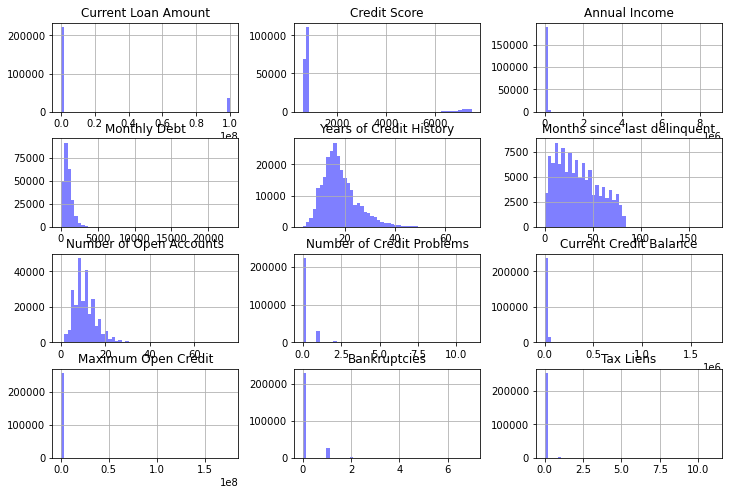

In [82]:
plt.figure();
df.hist(color="b", alpha=0.5, bins=50, figsize=(12, 8));

In [83]:
# 'Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 
#'Bankruptcies' and 'Tax Liens' are stronly skewd right
# on inspection, the maximum values here are orders of magnitude higher than the 75%

In [84]:
df[df['Current Loan Amount'] > 0.8e8]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,3 years,Home Mortgage,64760.0,Debt Consolidation,582.840027,26.8,NaN,11,0,8880,22711.0,0.0,0.0
16,0002c691-5314-44ab-b205-3fb1cc4ee6b2,41207d1e-5d13-43ec-9fe9-f222b4da5e0c,Fully Paid,99999999,Short Term,744.0,6 years,Home Mortgage,65605.0,Debt Consolidation,984.070007,21.0,NaN,5,1,11514,17262.0,1.0,0.0
23,0003fbfd-33ee-4ae9-8074-b46f6ff59281,c14bbc84-5041-4e70-bd64-3db51f7e80ae,Fully Paid,99999999,Short Term,745.0,10+ years,Rent,39476.0,other,483.579987,15.4,79.0,12,0,4636,21171.0,0.0,0.0
28,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,99999999,Short Term,724.0,1 year,Own Home,34297.0,Home Improvements,777.380005,13.6,2.0,12,0,6720,53335.0,0.0,0.0
42,0008cacc-1ea9-4599-b114-12709b13c85d,cd853967-4535-4d36-bf93-269504c74911,Fully Paid,99999999,Short Term,750.0,10+ years,Own Home,86785.0,Other,56.410000,22.0,NaN,7,0,3959,63862.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256938,fff2ae68-b9ca-4fb2-a53e-32684915bc6e,3a9268d1-a96b-4e7c-a022-8deea10d0b12,Fully Paid,99999999,Short Term,663.0,8 years,Home Mortgage,108482.0,Home Improvements,1365.069946,20.3,NaN,13,0,17264,23174.0,0.0,0.0
256953,fff72330-5397-4cbd-ad39-4d54bbc0dca9,a901d714-eaa1-4b31-b385-c51c0fa6eabd,Fully Paid,99999999,Short Term,698.0,7 years,Rent,65941.0,Debt Consolidation,1364.969971,21.5,NaN,16,0,19104,23556.0,0.0,0.0
256954,fff72f03-243b-422c-ab33-cb15e80e4c0d,f5cf8f78-6b65-4805-9b61-46086c441b08,Fully Paid,99999999,Short Term,742.0,10+ years,Rent,118128.0,Debt Consolidation,2608.659912,17.0,NaN,17,0,35089,55520.0,0.0,0.0
256963,fffb62c8-6149-4746-8b10-e1d2363f3b31,30e19db5-7ffe-4375-a253-f86dc565dfe8,Fully Paid,99999999,Short Term,738.0,10+ years,Rent,34749.0,Debt Consolidation,833.979980,11.0,25.0,17,0,3146,16050.0,0.0,0.0


In [85]:
# the size of the Current Loan Amount = 99999999 may be indicate a short-term loan of 100 MLN 
# but is more likely to indicate a missing value

In [86]:
df['Current Loan Amount']=df['Current Loan Amount'].replace(99999999, np.nan)

In [87]:
df[df['Current Loan Amount']> 0.8e8]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


<Figure size 432x288 with 0 Axes>

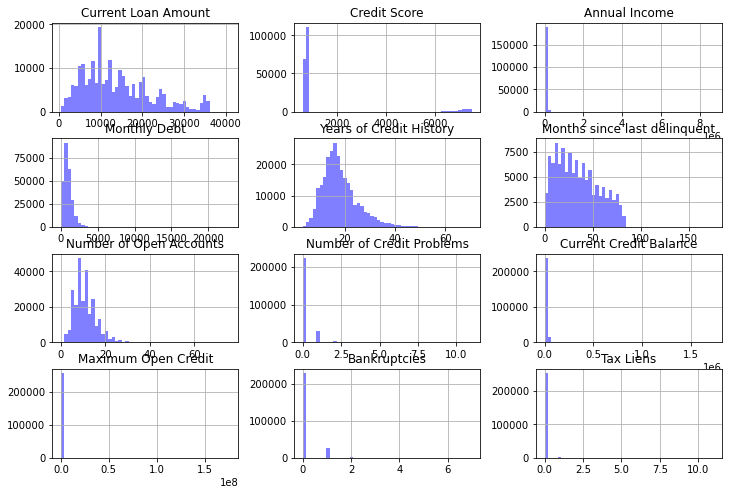

In [88]:
plt.figure();
df.hist(color="b", alpha=0.5, bins=50, figsize=(12, 8));

In [89]:
df[df['Credit Score'] < 1000]['Credit Score']

0         741.0
1         734.0
2         747.0
3         747.0
4         746.0
          ...  
256976    700.0
256978    717.0
256980    737.0
256982    746.0
256983    678.0
Name: Credit Score, Length: 179121, dtype: float64

In [90]:
df[df['Credit Score'] > 1000]['Credit Score']

6         6640.0
55        7320.0
71        7180.0
73        6670.0
79        7270.0
           ...  
256946    7450.0
256948    7220.0
256952    7410.0
256977    7170.0
256981    7460.0
Name: Credit Score, Length: 16187, dtype: float64

In [91]:
# it appears that crerdit scores for ovwe 16 000 individuals are 10 times as high as the rest
# the line below divides that data

In [92]:
df['Credit Score'] = np.where( df['Credit Score'] > 1000, df['Credit Score']/10, df['Credit Score'])

In [93]:
df[df['Annual Income'] > 2e6]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
34065,21ea699e-4eea-4908-9d67-7ae36f31d221,4e0d2d18-db25-40f6-ab3a-7746cd676d2e,Fully Paid,NaN,Short Term,746.0,10+ years,Home Mortgage,5879400.0,Home Improvements,783.919983,14.9,40.0,4,0,8917,9308.0,0.0,0.0
39791,2790a78c-3405-4403-b9fa-c46dcb296c02,824b8012-5314-453d-aa28-b9ee9e4bfded,Fully Paid,NaN,Short Term,735.0,7 years,Home Mortgage,2267570.0,Home Improvements,4516.240234,16.4,NaN,8,0,40925,42017.0,0.0,0.0
110725,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006.0,Short Term,725.0,10+ years,Home Mortgage,8713547.0,Debt Consolidation,798.739990,16.0,NaN,11,0,16462,30429.0,0.0,0.0
110726,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006.0,Short Term,725.0,10+ years,Home Mortgage,8713547.0,Debt Consolidation,798.739990,16.0,NaN,11,0,16462,30429.0,0.0,0.0
169514,a88c6d42-44b3-4a29-afdf-84e31a4ce246,419bfdfe-66fa-4e7e-a568-e4e090c39796,Fully Paid,9899.0,Short Term,748.0,3 years,Home Mortgage,7523240.0,Home Improvements,564.239990,27.4,21.0,18,0,2469,15725.0,0.0,0.0


In [94]:
# Annual income looks possible
# records 110725 amd 110726 are identical
df.drop(110726,inplace=True);

In [95]:
df[df['Annual Income'] > 2e6]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
34065,21ea699e-4eea-4908-9d67-7ae36f31d221,4e0d2d18-db25-40f6-ab3a-7746cd676d2e,Fully Paid,NaN,Short Term,746.0,10+ years,Home Mortgage,5879400.0,Home Improvements,783.919983,14.9,40.0,4,0,8917,9308.0,0.0,0.0
39791,2790a78c-3405-4403-b9fa-c46dcb296c02,824b8012-5314-453d-aa28-b9ee9e4bfded,Fully Paid,NaN,Short Term,735.0,7 years,Home Mortgage,2267570.0,Home Improvements,4516.240234,16.4,NaN,8,0,40925,42017.0,0.0,0.0
110725,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006.0,Short Term,725.0,10+ years,Home Mortgage,8713547.0,Debt Consolidation,798.739990,16.0,NaN,11,0,16462,30429.0,0.0,0.0
169514,a88c6d42-44b3-4a29-afdf-84e31a4ce246,419bfdfe-66fa-4e7e-a568-e4e090c39796,Fully Paid,9899.0,Short Term,748.0,3 years,Home Mortgage,7523240.0,Home Improvements,564.239990,27.4,21.0,18,0,2469,15725.0,0.0,0.0


In [96]:
df[df['Current Credit Balance'] > 0.5e6]['Current Credit Balance']

50301      635869
62025      620865
64449     1731412
91116      690447
113169     581847
147395     651469
158824     597996
171383     560563
174767     611537
181605     553322
188421     515169
188422     515169
188572     575644
194645    1730472
194646    1730472
206401     642425
206402     642817
206403     642425
206404     642817
209116     609289
215311     573075
216996     664495
220310     854602
220311     854602
221770     654294
227883     818209
239235     512671
Name: Current Credit Balance, dtype: int64

In [97]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount              35210
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140382
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  4
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [98]:
# remove 'Months since last delinquent', as well as Loan ID and Customer ID columns

In [99]:
df_new=df.drop(['Loan ID', 'Customer ID', 'Months since last delinquent'], axis=1)

In [100]:
# remove alll rows with NaN

In [101]:
df_new=df_new.dropna(axis=0)

In [102]:
df_new.shape

(152331, 16)

<Figure size 432x288 with 0 Axes>

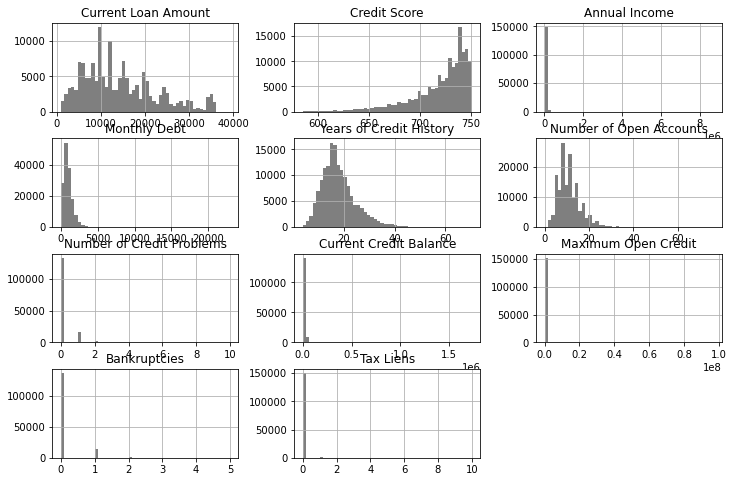

In [103]:
plt.figure();
df_new.hist(color="k", alpha=0.5, bins=50, figsize=(12, 8));

In [104]:
len(df_new[df_new['Annual Income'] > 1e6])

17

In [105]:
df_new[df_new['Annual Income'] > 1e6].index

Int64Index([ 20887,  41478,  59207,  70592,  81435,  93584, 110725, 123811,
            144081, 169514, 171828, 179983, 184044, 198369, 204833, 204834,
            206759],
           dtype='int64')

In [106]:
#df_new.drop(df_new[df_new['Annual Income'] > 1e6].index, inplace = True)

In [107]:
len(df_new[df_new['Current Credit Balance'] > 1e6]) # these can be removed

1

In [108]:
df_new.drop(df_new[df_new['Current Credit Balance'] > 1e6].index, inplace = True)

In [109]:
len(df_new[df_new['Maximum Open Credit'] > 0.2e8])

6

In [110]:
df_new[df_new['Maximum Open Credit'] > 0.2e8]['Maximum Open Credit']

65497     36284335.0
118747    26211875.0
118748    26211875.0
152015    96708247.0
241241    69988086.0
252920    44559330.0
Name: Maximum Open Credit, dtype: float64

In [111]:
#df_new.drop(df_new[df_new['Maximum Open Credit'] > 0.2e8].index, inplace = True)

In [112]:
df_new.shape

(152330, 16)

<Figure size 432x288 with 0 Axes>

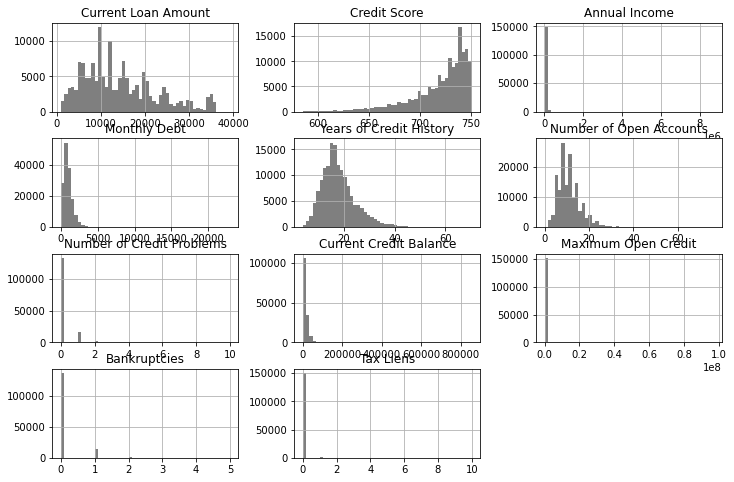

In [113]:
plt.figure();
df_new.hist(color="k", alpha=0.5, bins=50, figsize=(12, 8));

In [114]:
df_new[df_new['Maximum Open Credit'] > 0.2e7].index

Int64Index([  2996,   6254,  10485,  32518,  36013,  36705,  41926,  44825,
             49606,  55044,  57418,  59887,  65497,  77126,  77127,  78506,
             80008,  81490,  92674,  93988,  96462,  97720, 103067, 106310,
            109798, 112767, 118747, 118748, 142231, 144975, 147519, 148418,
            149646, 152015, 159079, 166387, 170528, 170550, 174296, 179078,
            181979, 186238, 188933, 191256, 199187, 199488, 208855, 215152,
            218131, 219122, 219926, 225995, 225996, 227883, 228312, 228313,
            231225, 240984, 241241, 252072, 252920, 254584],
           dtype='int64')

In [115]:
# the rest of data stays as is

In [116]:
for i in range(len(df_new.index)) :
    if df_new.iloc[i].isnull().sum()>=1:
        print("NaN in row ", i , " : " ,  df_new.iloc[i].isnull().sum())

In [117]:
# there is no NaN left
# export result to a csv file:
df_new.to_csv('df_new.csv', index=False)

# Explore Relationships Between Variables

In [118]:
# substitute Loan Status categories with 1,0

In [119]:
df_new['Loan Status'] = df_new['Loan Status'].apply(lambda x: 0 if x=="Fully Paid" else 1)
#df_new['Loan Status'] = df_new['Loan Status'].apply(lambda x: 0 if pd.to_numeric(x))
df_new['Loan Status'].value_counts()

0    94810
1    57520
Name: Loan Status, dtype: int64

##### Term

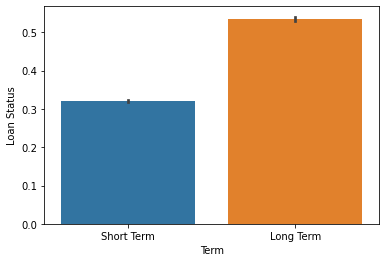

In [120]:
sns.barplot(x="Term", y='Loan Status', data=df_new) 
plt.show()

In [121]:
# the larger value indicates more defaulted loans: long term loans are more likely to default

##### Years in current job

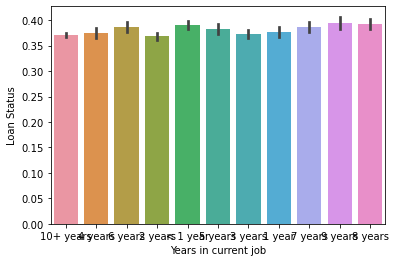

In [122]:
sns.barplot(x='Years in current job', y='Loan Status', data=df_new)
plt.show()

In [123]:
# years in current job is not a great discriminator

##### Home Ownership

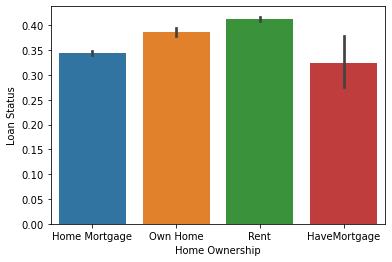

In [124]:
sns.barplot(x='Home Ownership', y='Loan Status', data=df_new)
plt.show()

In [125]:
# Home Ownership is not very good at discriminating, except that the people who rent tend to default the most

##### Purpose

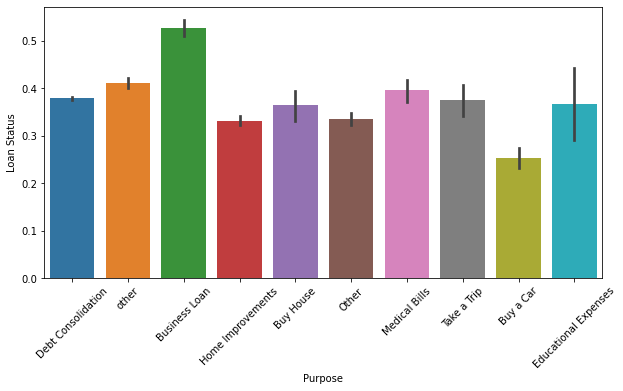

In [126]:
plt.figure(figsize=(10,5))
chart = sns.barplot(x='Purpose', y='Loan Status', data=df_new)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
# Business loans tend to default the most

##### Loan Amount

In [129]:
# binning loan amount
def loan_amount(n):
    if n<10000:
        return 'low'
    elif n>=10000 and n<20000:
        return 'medium'
    elif n >= 20000 and n < 40000:
        return 'high'
    else:
        return 'very high'
    
loan_categories= df_new['Current Loan Amount']. apply(lambda x: loan_amount(x))

In [130]:
loan_categories.value_counts()

medium    60907
low       56692
high      34731
Name: Current Loan Amount, dtype: int64

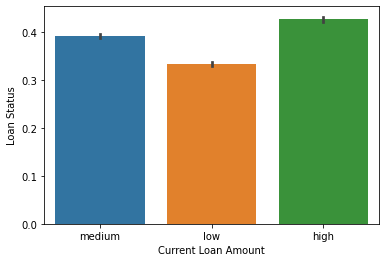

In [131]:
sns.barplot(x=loan_categories, y='Loan Status', data=df_new)
plt.show()

##### Monthly Debt

In [133]:
# binning monthly debt
def loan_amount(n):
    if n<1000:
        return 'low'
    elif n>=1000 and n<3000:
        return 'medium'
    elif n >= 3000 and n < 5000:
        return 'high'
    else:
        return 'very high'
    
monthly_debt_categories= df_new['Current Loan Amount']. apply(lambda x: loan_amount(x))

In [134]:
monthly_debt_categories.value_counts()

very high    135537
high          10932
medium         5622
low             239
Name: Current Loan Amount, dtype: int64

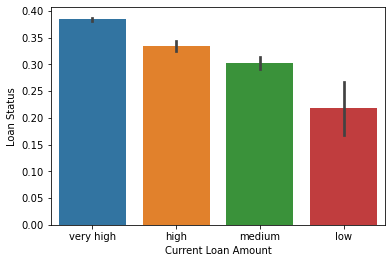

In [135]:
sns.barplot(x=monthly_debt_categories, y='Loan Status', data=df_new)
plt.show()

In [ ]:
# high monthly debt is more likely to default on a loan than low

#### Annual Income

In [142]:
# binning Annual Income
def annual_income(n):
    if n<4e4:
        return 'low'
    elif n>=4e4 and n<6e4:
        return 'medium'
    elif n >= 6e4 and n < 1e5:
        return 'high'
    else:
        return 'very high'
    
annual_income_categories= df_new['Annual Income']. apply(lambda x: annual_income(x))

In [143]:
annual_income_categories.value_counts()

high         54791
medium       44436
low          27328
very high    25775
Name: Annual Income, dtype: int64

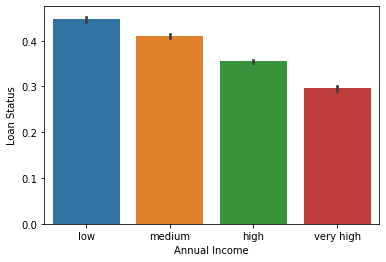

In [144]:
sns.barplot(x=annual_income_categories, y='Loan Status', data=df_new)
plt.show()

In [ ]:
# Low income is significanlty more likely to default as there is a lower number of them in the first place